#Please do not distribute this file to other people without my permission by Tyller

#EY Regression Model
Steps include in this program
1. Data cleaning
2. Company Box-Cox transformation
3. Standardization
4. Relationship between company index and regressor
5. First regression model (without consider corlinearility and large column with small row number)
6. Company PCA
7. Second regression model (with company PCA)
8. Third regression model: Exclude high VIF column regression
9. Forth regression model: Include high VIF PCA regression

# Data Clearning

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel("/content/EY_資料格式.xlsx")

We set two different regressor, which is 牧德公司的營收與由田公司的營收。 But in this program, I will only go through 牧德公司的營收, since they have similar result.

In [ ]:
y_1 = data["牧德_營收"]
y_2 = data["由田_營收"]

In [ ]:
data.head()

,海康威視_營收,海康威視_毛利,海康威視_淨利,海康威視_EPS,海康威視_現金,海康威視_應收帳款,海康威視_廠房,海康威視_總支產餘額,海康威視_流動負債,海康威視_總負債,海康威視_股本,海康威視_保留盈餘,海康威視_股價,奧普特_營收,奧普特_毛利,奧普特_淨利,奧普特_EPS,奧普特_現金,奧普特_應收帳款,奧普特_廠房,奧普特_流動負債,奧普特_總負債,奧普特_股價,大恒图像视觉有限公司_毛利,大恒图像视觉有限公司_EPS,大恒图像视觉有限公司_應收帳款,大恒图像视觉有限公司_廠房,大恒图像视觉有限公司_流動負債,大恒图像视觉有限公司_總負債,大恒图像视觉有限公司_股本,大恒图像视觉有限公司_保留盈餘,大恒图像视觉有限公司_股價,康耐視(美股)_應收帳款,康耐視(美股)_廠房,康耐視(美股)_總支產餘額,康耐視(美股)_流動負債,康耐視(美股)_總負債,康耐視(美股)_股本,康耐視(美股)_保留盈餘,康耐視(美股)_股價,...,由田_應收帳款,由田_總支產餘額,由田_流動負債,由田_總負債,由田_保留盈餘,由田_股價,牧德_毛利,牧德_淨利,牧德_EPS,牧德_現金,牧德_應收帳款,牧德_總支產餘額,牧德_流動負債,牧德_總負債,牧德_保留盈餘,牧德_股價,精測電子_營收,精測電子_毛利,精測電子_淨利,精測電子_EPS,精測電子_現金,精測電子_應收帳款,精測電子_廠房,精測電子_總支產餘額,精測電子_流動負債,精測電子_總負債,精測電子_股本,精測電子_保留盈餘,精測電子_股價,TDY_營收,TDY_毛利潤,TDY_淨利潤,TDY_現金,TDY_應收,TDY_固定資產,TDY_資產,TDY_流動負債,TDY_負債,TDY_保留盈餘,TDY_股價
0,7.562758e+10,1.432463e+10,16660726840,1.79,113863049909,98341871570,25350454741,337518739832,103994036515,131495423845,39816287089,131484983000,162.38,2.617757e+09,7.304117e+09,5.441911e+08,0.810001,1467072771,2968210690,1210086946,5392425430,5586436404,48.70,5642285014,19.880001,4221244988,2395284638,4110777321,16357412797,10291836,6.971125e+08,1857.25,4221244988,2395284638,60763557093,4110777321,16357412797,10291836,6.971125e+08,1857.250001,...,1696074000,3967656000,1660446000,1897360000,815760000,50.86,284576000,85812000,2.01,1500477000,1151949000,3695516000,923481000,1208083000,1368958000,291.94,2151653500,4.030622e+08,434591400.0,1.79,3.966712e+09,3.834630e+09,1.171692e+09,1.937154e+10,8.553499e+09,1.235603e+10,1.052393e+09,3.434765e+09,219.85,22087635500,8566699750,2769064050,13402977750,19174072900,14028155150,142640711500,19793352400,53405484500,1.554097e+09,9147.93780
1,6.128568e+10,1.198554e+10,12943856646,1.38,94121019340,91389796027,25587789792,306507610250,90383958944,117987164223,39816287089,115225750868,129.31,2.490838e+09,7.181667e+09,4.804629e+08,0.730001,1524892600,3072172196,1224164299,5566906208,5750951831,46.44,3502674341,4.540001,3321962686,2475230672,4263621400,16466523947,10203367,7.264841e+08,1696.97,3321962686,2475230672,57058171928,4263621400,16466523947,10203367,7.264841e+08,1696.970001,...,1777658000,4168963000,2034095000,2205205000,709574000,47.27,456392000,206309000,4.71,1665772000,1407195000,4096429000,1269213000,1561871000,1413313000,322.84,1823579600,1.678716e+08,166593370.0,0.68,4.260700e+09,4.260700e+09,1.150389e+09,1.890333e+10,8.434447e+09,1.244124e+10,1.052393e+09,2.994467e+09,290.79,21919545350,8336681650,2763166150,11288580600,19256643500,14019308300,139727148900,22182001900,54800337850,2.506608e+08,9169.76003
2,4.212645e+10,7.061912e+09,6940282754,0.71,105155953386,88218728658,26385090613,326524306055,88511223908,116587179344,41751638805,136078727987,121.52,1.232062e+09,6.803871e+09,1.000000e-06,0.000001,1376462168,2917625103,1253843057,5323392290,5507437913,52.32,3716709133,8.380001,3124353546,2556798629,4442416238,16442873368,10144388,3.338609e+08,1179.29,16278204,51105304,203595508,382242899,418102131,3863125,1.796937e+09,5.460001,...,1705013000,4424230000,2351870000,2488410000,679598000,52.52,444725000,227670000,5.30,1058295000,1303815000,3424615000,1326700000,1626496000,1207342000,364.17,1295252800,2.496770e+07,21303500.0,0.13,2.782237e+09,4.000797e+09,1.129086e+09,1.746533e+10,7.118292e+09,1.107782e+10,1.048132e+09,3.130592e+09,222.07,23137461700,8610934000,2424036900,6823870300,19701934950,14022257250,135209357500,22400224200,54024764000,1.000000e-06,8766.34367
3,7.961259e+10,1.635524e+10,19529166625,2.15,120952053295,95199557144,25874006908,336684473294,105086245431,133520834747,41751638805,129393694221,143.15,4.876009e+09,7.766241e+09,6.649891e+08,0.920001,2643689743,3304250846,1354190180,5343360574,5532974006,48.21,3848419625,19.320001,3334806063,2755962438,3712197563,16337557813,10630313,6.654324e+08,1656.33,3334806063,2755962438,58110372188,3712197563,16337557813,10630313,6.654324e+08,1656.330001,...,1751244000,3927382000,1664470000,1795714000,875175000,61.74,254213000,85895000,1.99,741899000,1195545000,3043991000,895309000,1001173000,142884

In [ ]:
part_data = data.drop(columns = ["牧德_營收", "由田_營收", "日期", "全友_股本"], errors = "ignore")

We drop out value that has no relationship with 牧德的營收。Since those columns are mostly coonstant or nearly constant.

In [ ]:
data = part_data.drop(columns = ["奧普特_總支產餘額", "奧普特_股本", "奧普特_保留盈餘", "大恒图像视觉有限公司_營收", "大恒图像视觉有限公司_淨利", "大恒图像视觉有限公司_總支產餘額", "全友_流動資產", "佳能_流動負債", "佳能_負債總額", "佳能_股本", "華晶科_不動產廠房及設備"
, "華晶科_資產總額", "華晶科_負債總額", "華晶科_股本", "華晶科_保留盈餘", "智基_不動產廠房及設備", "由田_廠房","由田_股本","牧德_廠房", "牧德_股本","TDY_普通股"], errors = "ignore")


The following output is the columns of dataset I have after I drop those unnecessary value.

In [ ]:
data.columns

Index(['海康威視_營收', '海康威視_毛利', '海康威視_淨利', '海康威視_EPS', '海康威視_現金', '海康威視_應收帳款',
       '海康威視_廠房', '海康威視_總支產餘額', '海康威視_流動負債', '海康威視_總負債',
       ...
       'TDY_毛利潤', 'TDY_淨利潤', 'TDY_現金', 'TDY_應收', 'TDY_固定資產', 'TDY_資產',
       'TDY_流動負債', 'TDY_負債', 'TDY_保留盈餘', 'TDY_股價'],
      dtype='object', length=121)

In [ ]:
column = data.columns

# Box Cox Transformation

To conduct Box Cox transformation, all value need to be positive. However in this dataset, some columns have negative value, so traditional Box Cox transformation is useless in this program.

To solve this problem, we conduct a new algorithm. 
1. Find the minimum number in each column.
2. If the minimum is less than 0, then we minus the minimum value to every value in that column and add $\epsilon$, where $\epsilon$ can be any number larger than  0
3. We conduct Box Cox transformation

In [ ]:
for i in range(len(column)):
  min = np.min(data[column[i]])
  if(min <= 0):
    data[column[i]] = data[column[i]] - min + 0.000001

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
def box_cox(name):
  #fig = plt.figure()
  #ax2 = fig.add_subplot(212)
  print(name)
  yt, lam= stats.boxcox(data[name]) #returns data,lambda
  #prob = stats.probplot(yt, dist=stats.norm, plot=ax2)
  #ax2.set_title('Probplot after Box-Cox transformation with lambda = '+ str(lam))
  return yt, lam

In [ ]:
lambda_trans = []
normalize_data = []
for i in range(len(column)):
  temp_1, temp_2 = box_cox(column[i])
  normalize_data.append(temp_1)
  lambda_trans.append(temp_2)


# Normalization

In order to draw better image relationship between companies and y, normalization is necessary.

In [ ]:
import sklearn

In [ ]:
from sklearn import preprocessing

In [ ]:
normalize_data = sklearn.preprocessing.normalize(normalize_data)

The following is the relationship we desire.

海康威視_營收


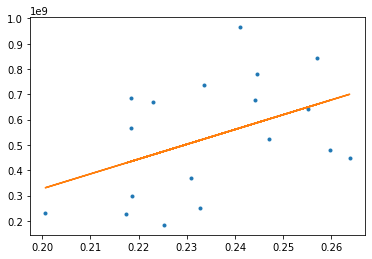

海康威視_毛利


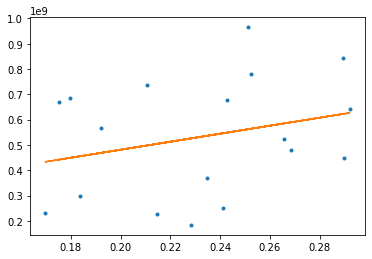

海康威視_淨利


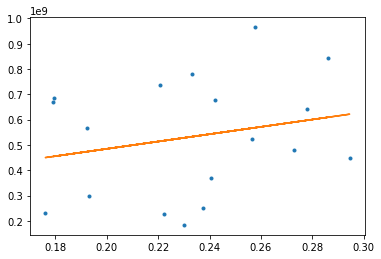

海康威視_EPS


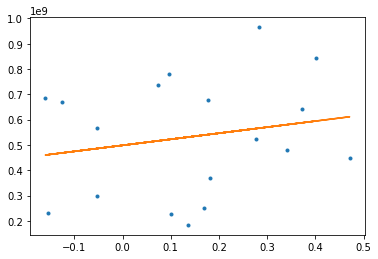

海康威視_現金


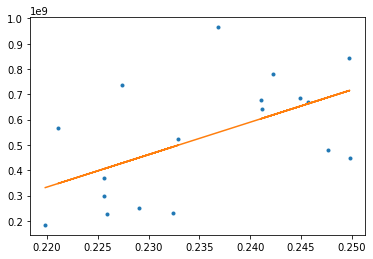

海康威視_應收帳款


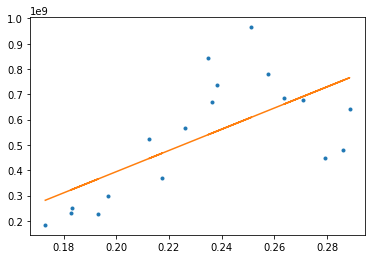

海康威視_廠房


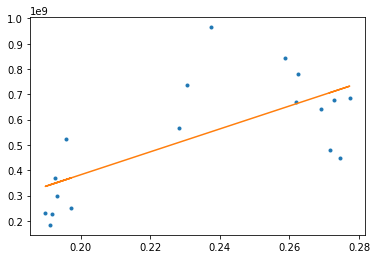

海康威視_總支產餘額


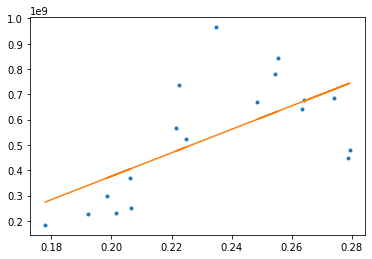

海康威視_流動負債


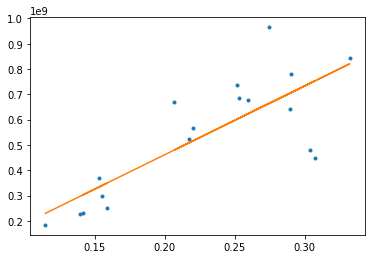

海康威視_總負債


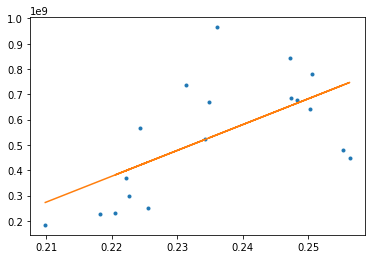

海康威視_股本


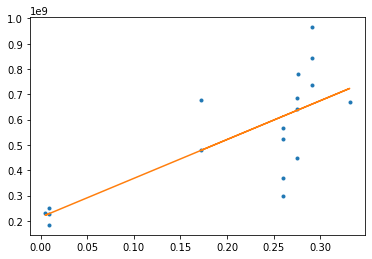

海康威視_保留盈餘


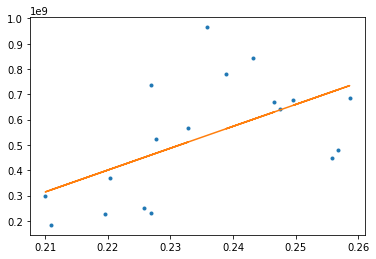

海康威視_股價


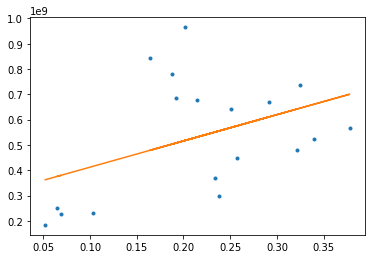

奧普特_營收


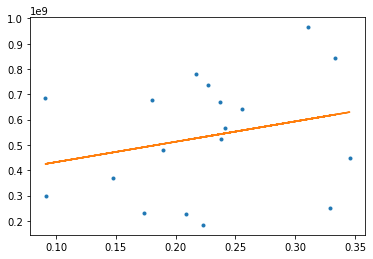

奧普特_毛利


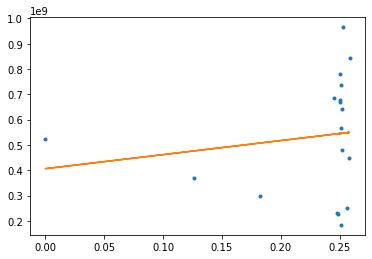

奧普特_淨利


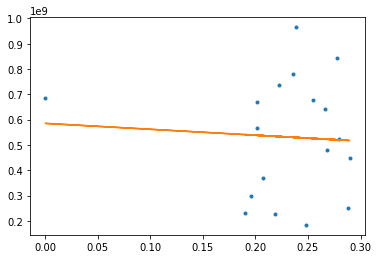

奧普特_EPS


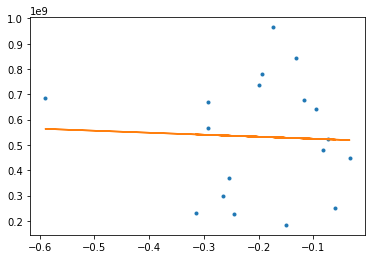

奧普特_現金


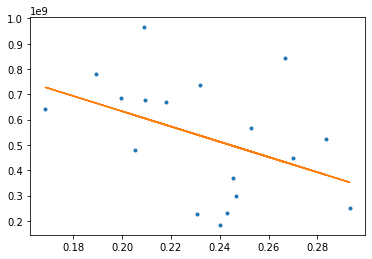

奧普特_應收帳款


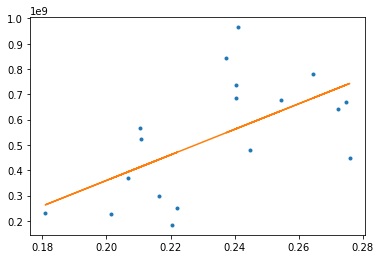

奧普特_廠房


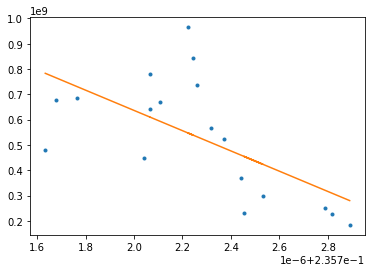

奧普特_流動負債


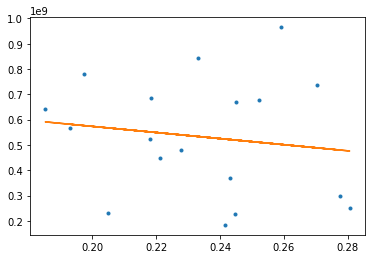

奧普特_總負債


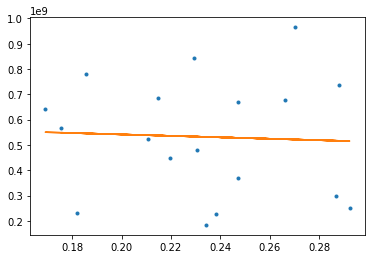

奧普特_股價


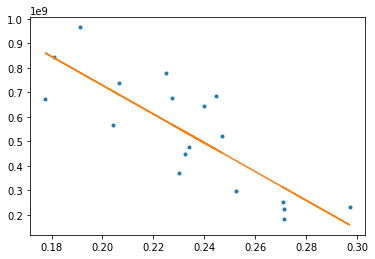

大恒图像视觉有限公司_毛利


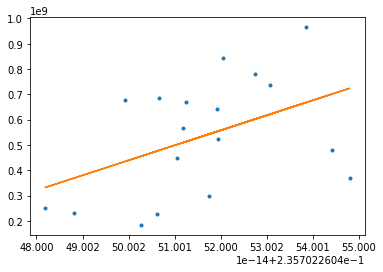

大恒图像视觉有限公司_EPS


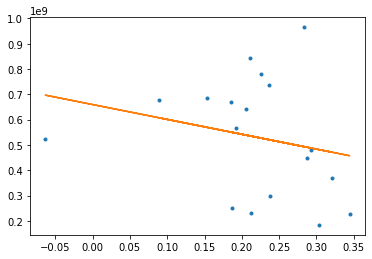

大恒图像视觉有限公司_應收帳款


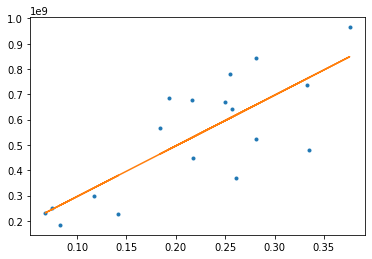

大恒图像视觉有限公司_廠房


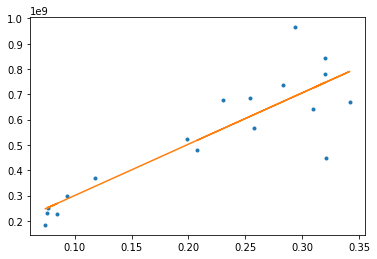

大恒图像视觉有限公司_流動負債


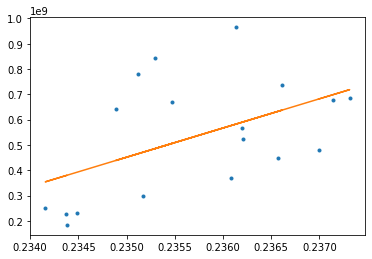

大恒图像视觉有限公司_總負債


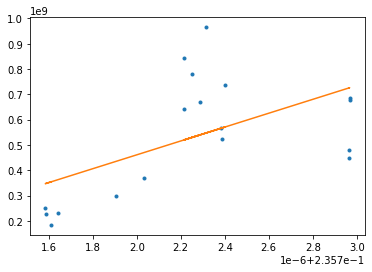

大恒图像视觉有限公司_股本


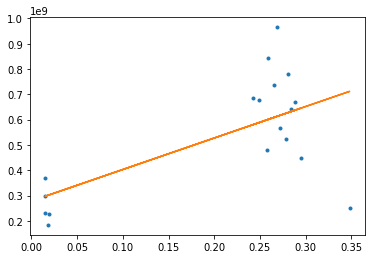

大恒图像视觉有限公司_保留盈餘


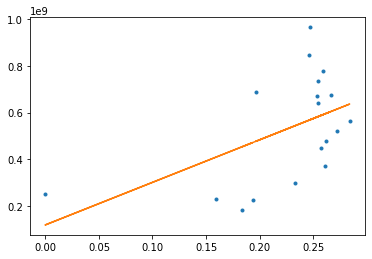

大恒图像视觉有限公司_股價


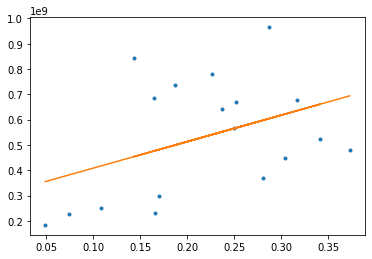

康耐視(美股)_應收帳款


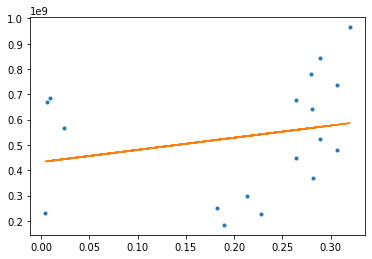

康耐視(美股)_廠房


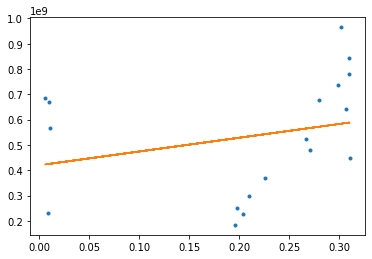

康耐視(美股)_總支產餘額


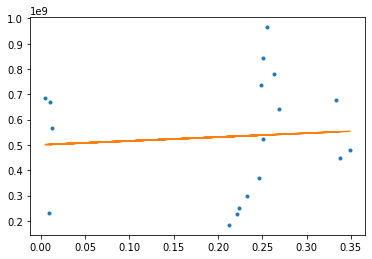

康耐視(美股)_流動負債


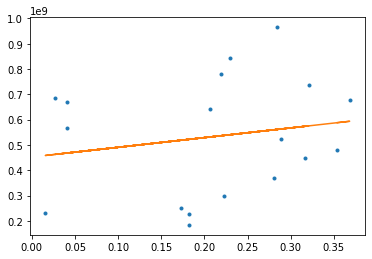

康耐視(美股)_總負債


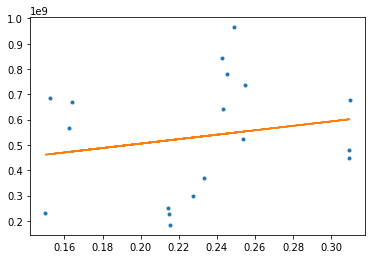

康耐視(美股)_股本


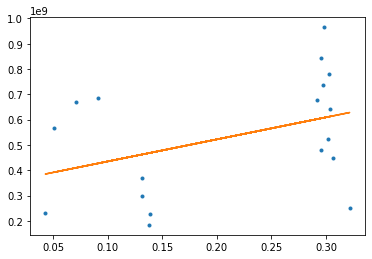

康耐視(美股)_保留盈餘


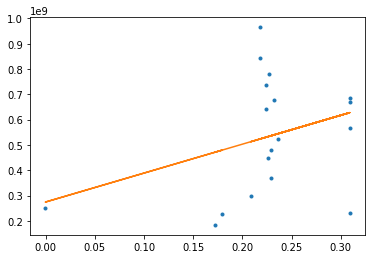

康耐視(美股)_股價


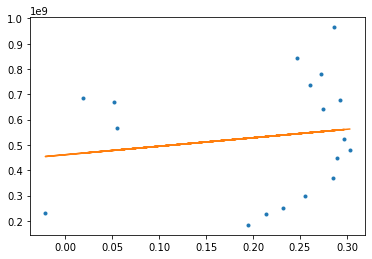

全友_現金及約當現金


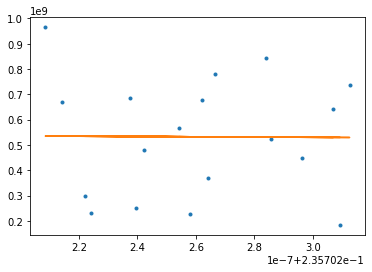

全友_應收帳款及票據


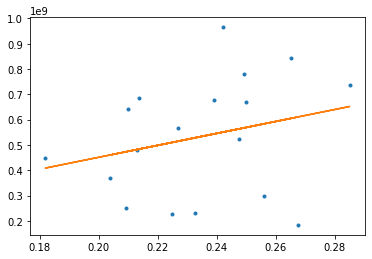

全友_不動產廠房及設備


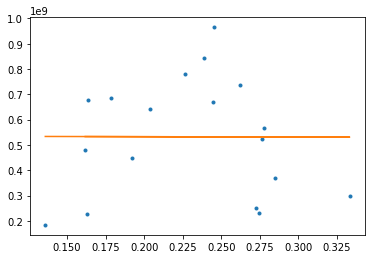

全友_資產總額


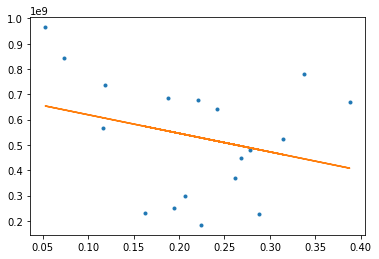

全友_流動負債


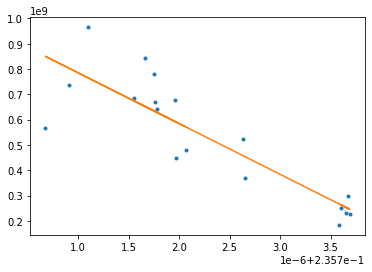

全友_負債總額


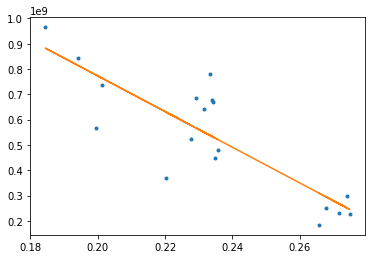

全友_保留盈餘


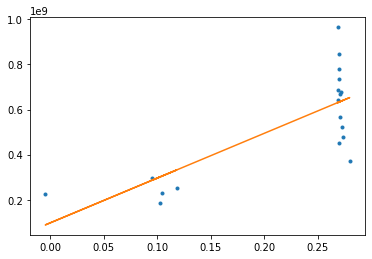

全友_營業收入淨額


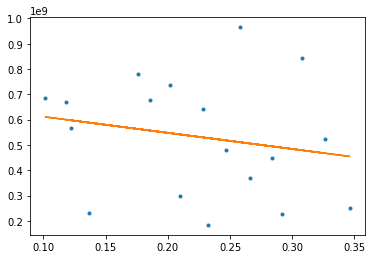

全友_營業毛利


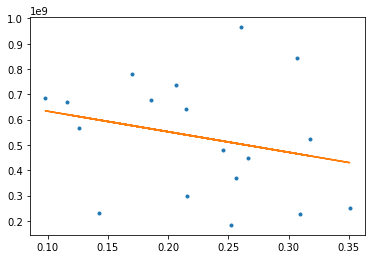

全友_常續性EPS


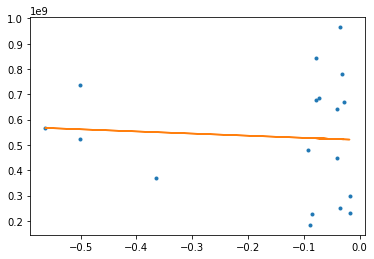

佳能_現金及約當現金


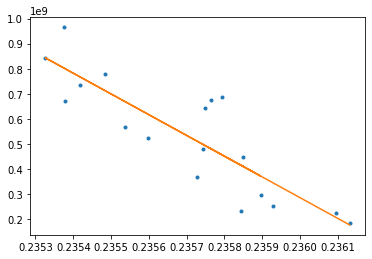

佳能_應收帳款及票據


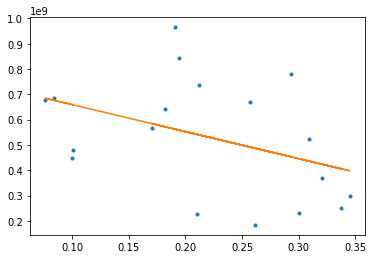

佳能_流動資產


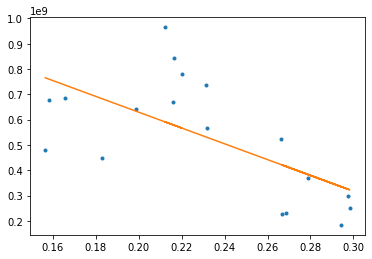

佳能_不動產廠房及設備


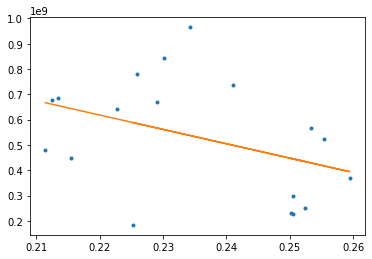

佳能_資產總額


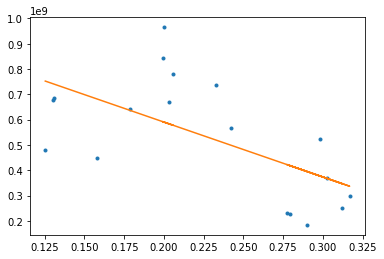

佳能_保留盈餘


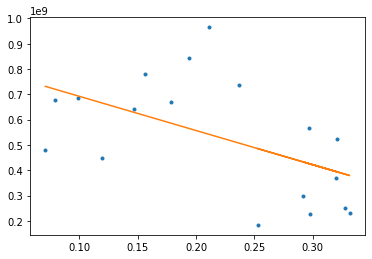

佳能_營業收入淨額


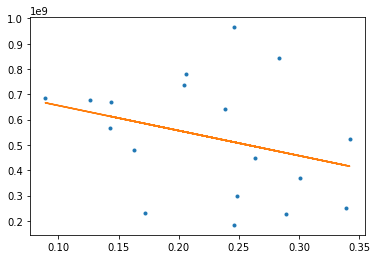

佳能_營業毛利


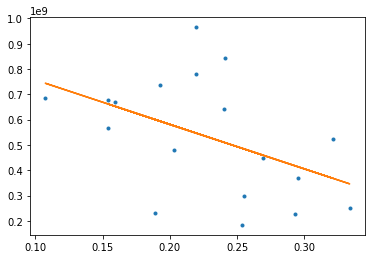

佳能_常續性EPS


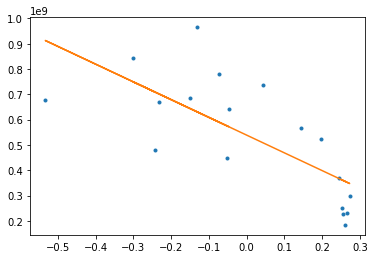

華晶科_現金及約當現金


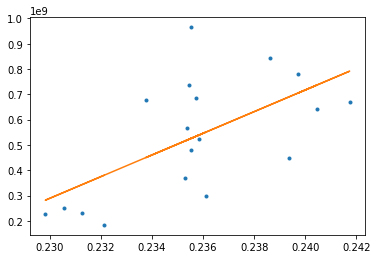

華晶科_應收帳款及票據


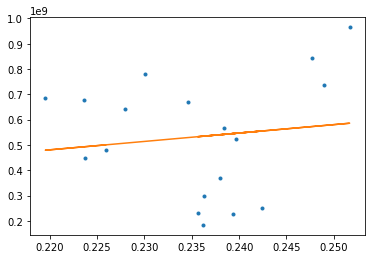

華晶科_流動資產


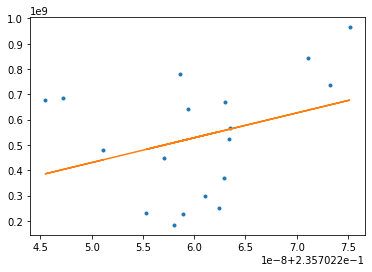

華晶科_流動負債


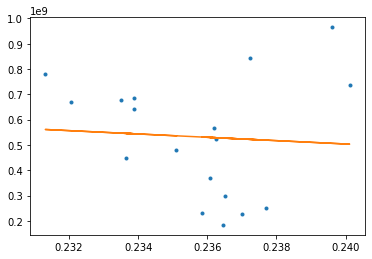

華晶科_營業收入淨額


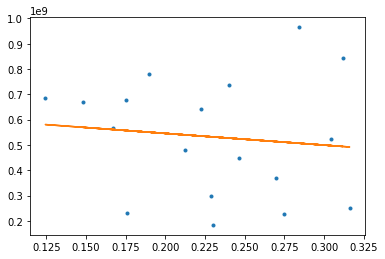

華晶科_營業毛利


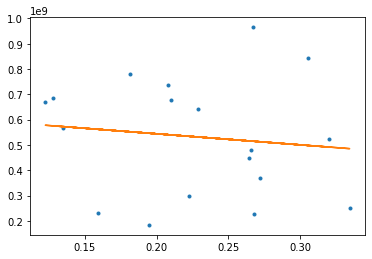

華晶科_常續性EPS


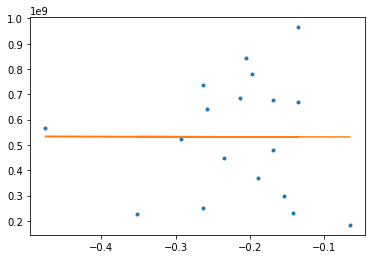

智基_現金及約當現金


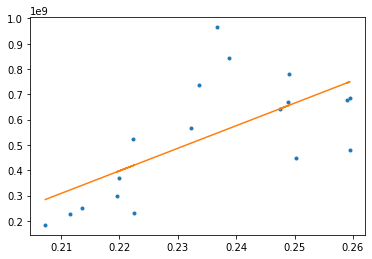

智基_應收帳款及票據


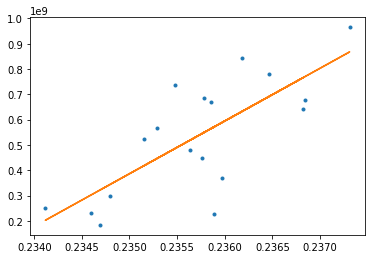

智基_流動資產


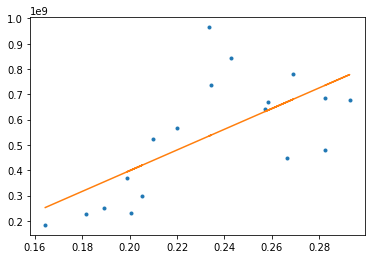

智基_資產總額


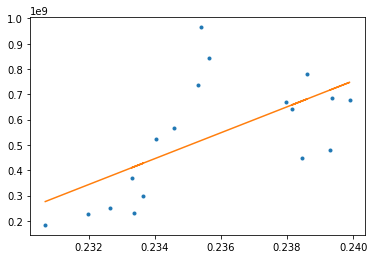

智基_流動負債


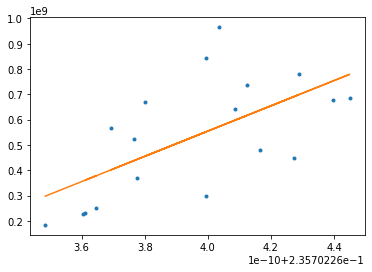

智基_負債總額


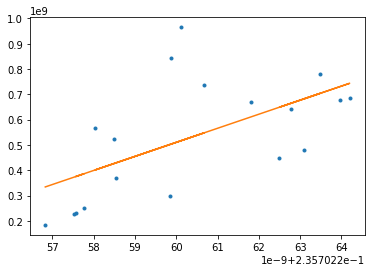

智基_股本


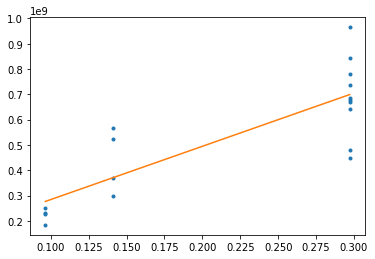

智基_保留盈餘


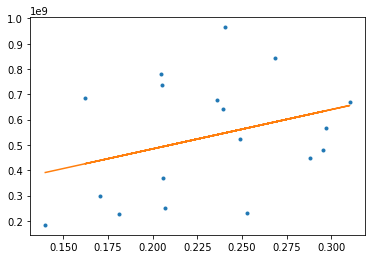

智基_營業收入淨額


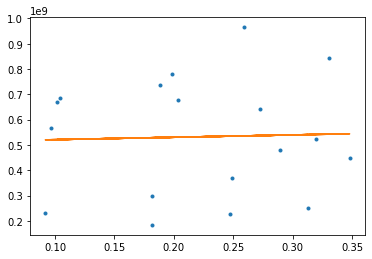

智基_營業毛利


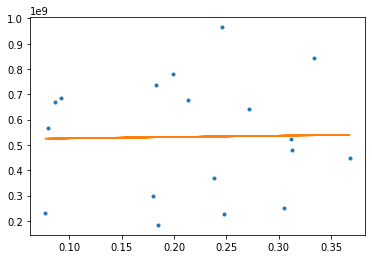

智基_常續性EPS


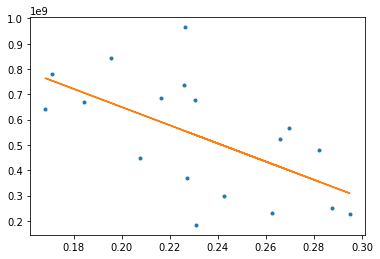

由田_毛利


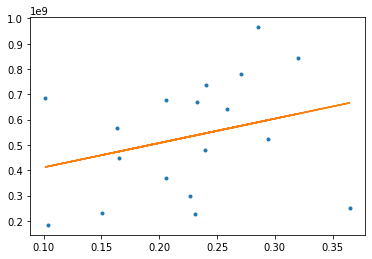

由田_淨利


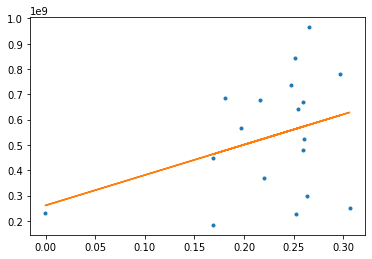

由田_EPS


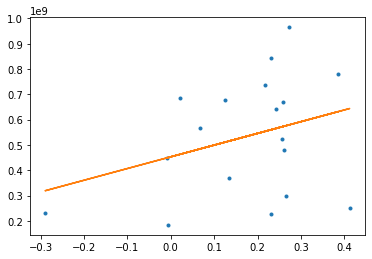

由田_現金


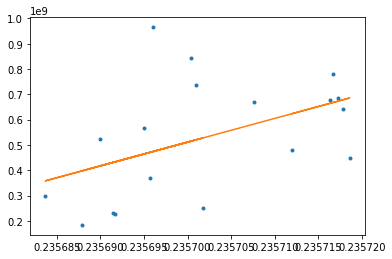

由田_應收帳款


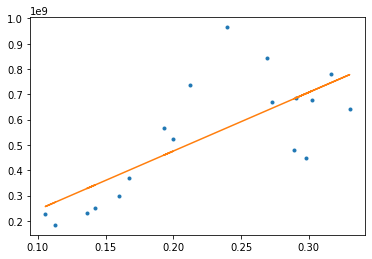

由田_總支產餘額


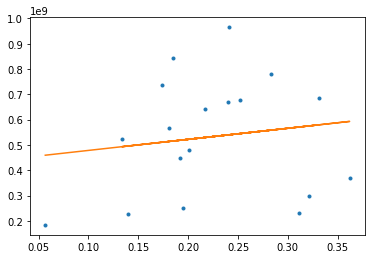

由田_流動負債


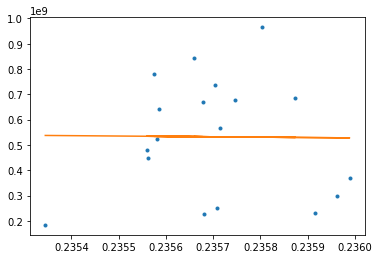

由田_總負債


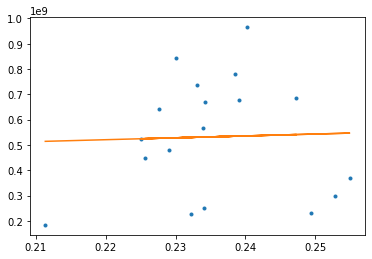

由田_保留盈餘


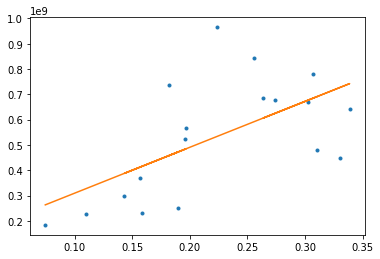

由田_股價


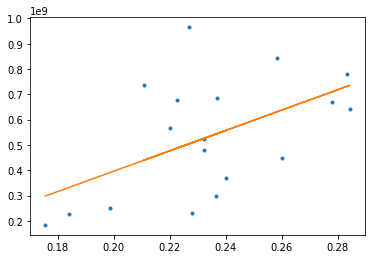

牧德_毛利


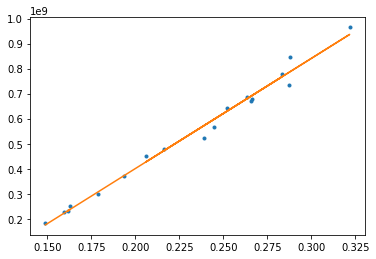

牧德_淨利


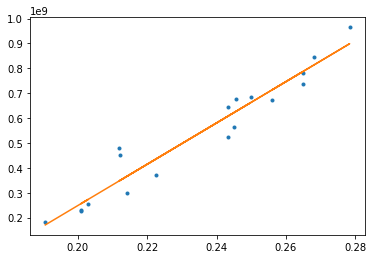

牧德_EPS


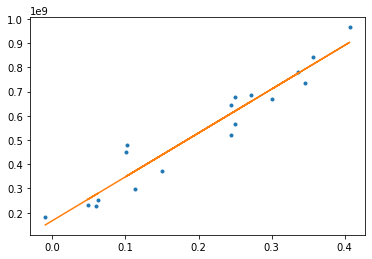

牧德_現金


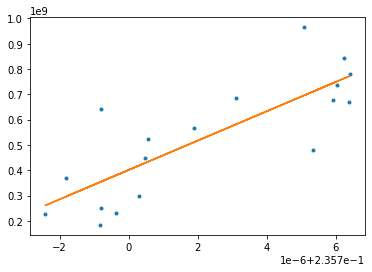

牧德_應收帳款


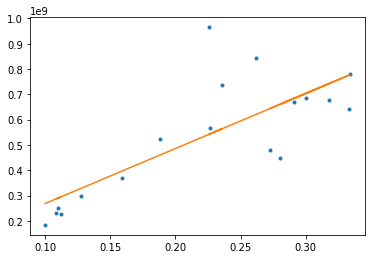

牧德_總支產餘額


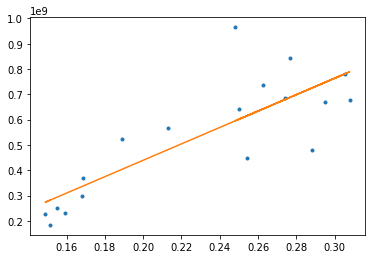

牧德_流動負債


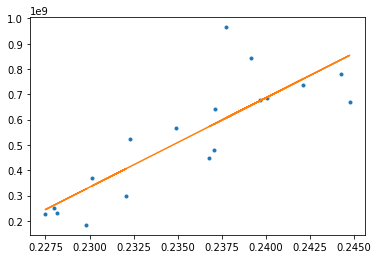

牧德_總負債


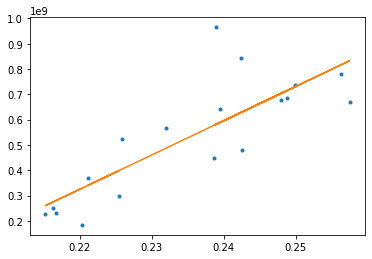

牧德_保留盈餘


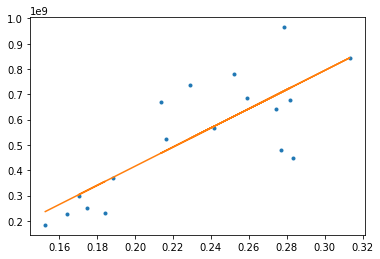

牧德_股價


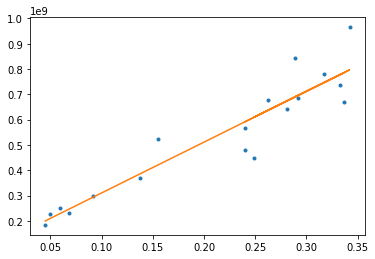

精測電子_營收


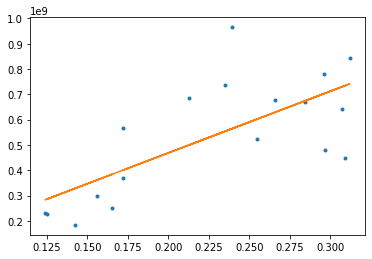

精測電子_毛利


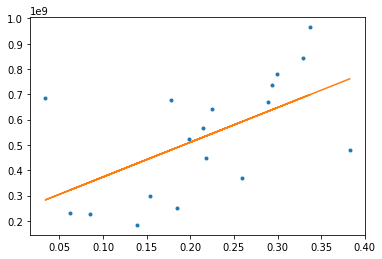

精測電子_淨利


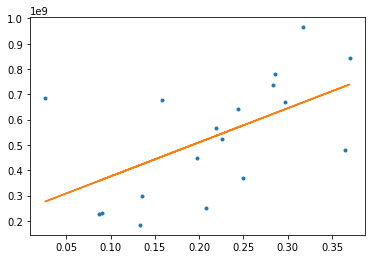

精測電子_EPS


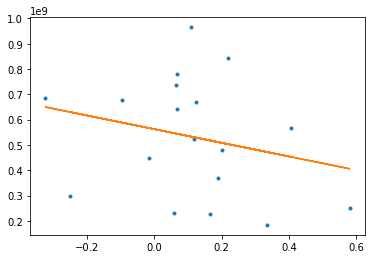

精測電子_現金


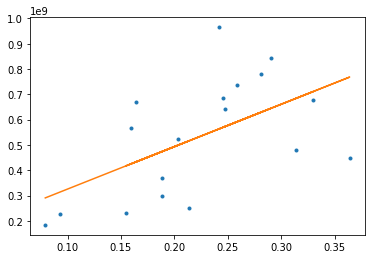

精測電子_應收帳款


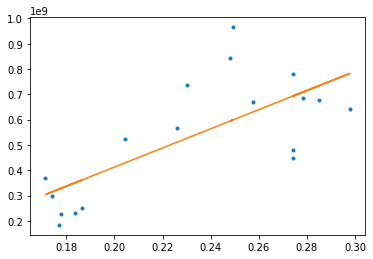

精測電子_廠房


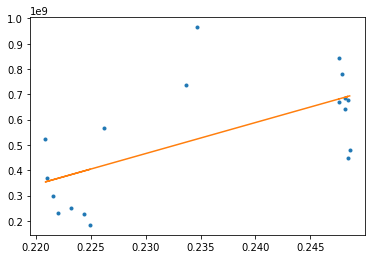

精測電子_總支產餘額


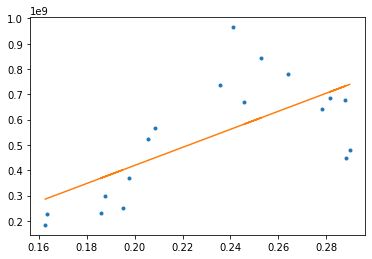

精測電子_流動負債


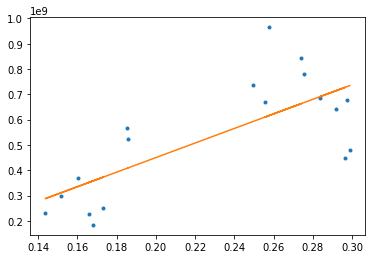

精測電子_總負債


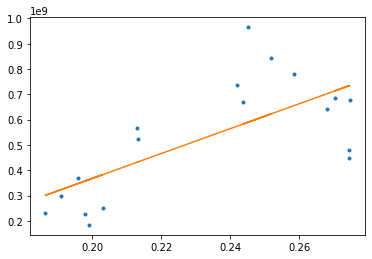

精測電子_股本


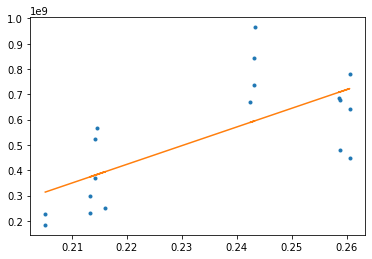

精測電子_保留盈餘


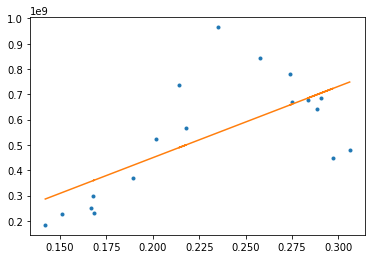

精測電子_股價


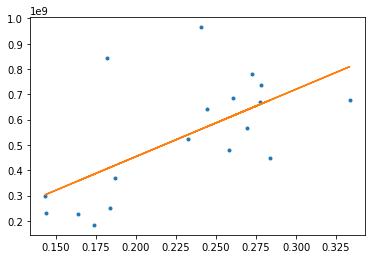

TDY_營收


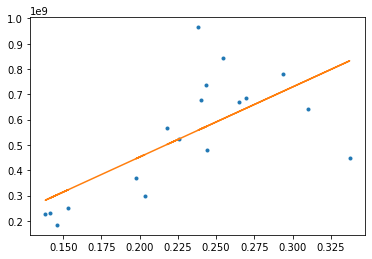

TDY_毛利潤


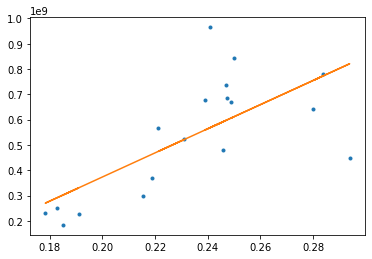

TDY_淨利潤


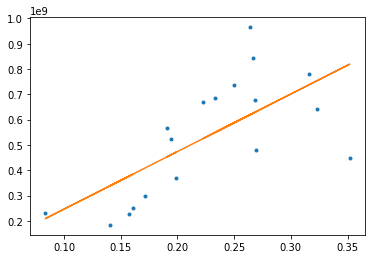

TDY_現金


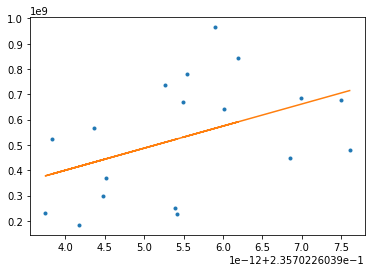

TDY_應收


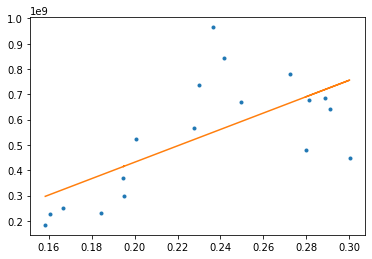

TDY_固定資產


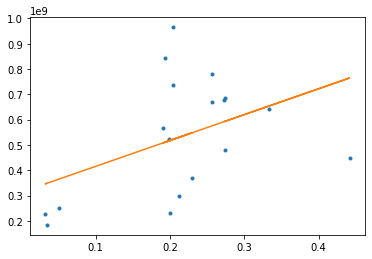

TDY_資產


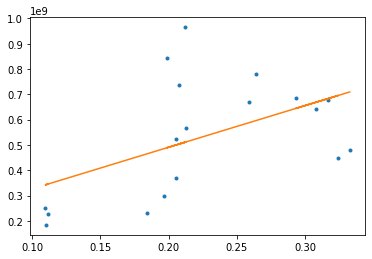

TDY_流動負債


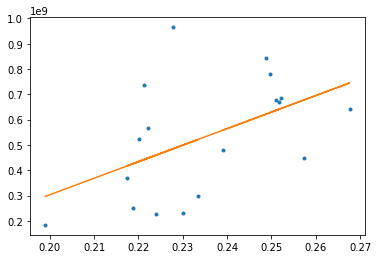

TDY_負債


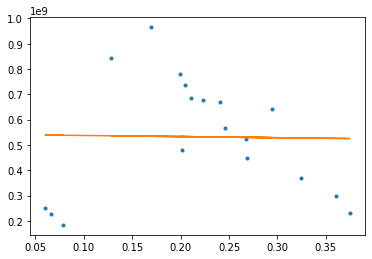

TDY_保留盈餘


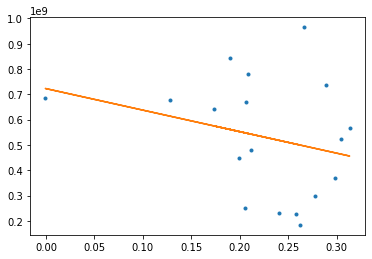

TDY_股價


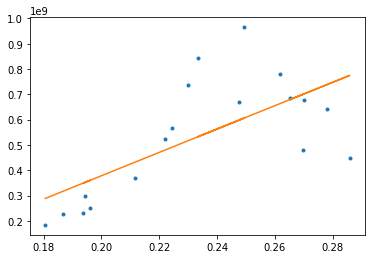

In [ ]:
for i in range(len(normalize_data)):
  print(column[i])
  plt.plot(normalize_data[i], y_1, '.')
  m, b = np.polyfit(normalize_data[i], y_1, 1)
  plt.plot(normalize_data[i], m*normalize_data[i] + b)
  plt.show()

# First Linear Regression Model (Without PCA)

In [ ]:
X = np.array(normalize_data)
X = np.transpose(X)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

This regression is useless since the number of column is larger than the data we have. To solve this problem, we have to choose the column that is more predictable and do some tricks to lower down the dimension.

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
results = sm.OLS(y_1,X).fit()
results.summary()  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regr

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  牧德_營收   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sat, 03 Apr 2021   Prob (F-statistic):                nan
Time:                        01:10:34   Log-Likelihood:                 224.84
No. Observations:                  18   AIC:                            -413.7
Df Residuals:                       0   BIC:                            -397.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.432e+07        inf          0        nan         nan         nan
x1          1.553e+06        inf          0        nan         nan         nan
x2          5.225e+07        inf          0        nan         nan         nan
x3          1.838e+07        inf          0        nan         nan         nan
x4          1.795e+07        inf          0        nan         nan         nan
x5          1.974e+06        inf          0        nan         nan         nan
x6          8.952e+06        inf          0        nan         nan         nan
x7         -8.331e+06        inf         -0        nan         nan         nan
x8         -9.022e+06        inf         -0        nan         nan         nan
x9          1.119e+08        inf          0        nan         nan         nan
x10         1.013e+07        inf          0        nan         nan         nan
x11         8.768e+07        inf          0        nan         nan         nan
x12         8.028e+05        inf          0        nan         nan         nan
x13        -1.989e+08        inf         -0        nan         nan         nan
x14          1.64e+08        inf          0        nan         nan         nan
x15        -6.518e+07        inf         -0        nan         nan         nan
x16        -4.906e+07        inf         -0        nan         nan         nan
x17        -1.678e+08        inf         -0        nan         nan         nan
x18        -5.525e+07        inf         -0        nan         nan         nan
x19        -3.279e+07        inf         -0        nan         nan         nan
x20          1.28e+07        inf          0        nan         nan         nan
x21        -8.412e+07        inf         -0        nan         nan         nan
x22        -1.204e+08        inf         -0        nan         nan         nan
x23        -2.687e+07        inf         -0        nan         nan         nan
x24          1.28e+07        inf          0        nan         nan         nan
x25        -1.256e+08        inf         -0        nan         nan         nan
x26         2.058e+08        inf          0        nan         nan         nan
x27         1.803e+08        inf          0        nan         nan         nan
x28         1.335e+07        inf          0        nan         nan         nan
x29          1.28e+07        inf          0        nan         nan         nan
x30         1.311e+08        inf          0        nan         nan         nan
x31         1.436e+08        inf          0        nan         nan         nan
x32         2.138e+08        inf          0        nan         nan         nan
x33         1.222e+08        inf          0        nan         nan         nan
x34         1.186e+08        inf          0        nan         nan         nan
x35        -5.317e+07        inf         -0        nan         nan         nan
x3

# Company PCA

In this part, I conduct Sample Pricipal Component Analysis to lower down the dimensions. To be more clear, I change every company's columns into one column. 

In [ ]:
company = []
column_list = list(column)
for i in range(len(column_list)):
  company.append(column_list[i].split("_")[0])

In [ ]:
company = list(set(company))

In [ ]:
def get_real_array(data):
  list_ = []
  for i in range(len(data)):
    list_.append(data[i][0]) 
  return list_

The following is the cofficient of how each column conbine with each other.

In [ ]:
from sklearn.decomposition import PCA

pca_data = pd.DataFrame()
temp_list = []

for i in company:
  print(i)
  pre_PCA_data = []
  coefficient_name = []
  for j in range(len(column_list)):
    if column_list[j].split("_")[0] == i:
      coefficient_name.append(column_list[j].split("_")[1])
      temp = (data[column_list[j]] - np.mean(data[column_list[j]])) / np.std(data[column_list[j]])
      pre_PCA_data.append(((list(temp))))

  pca = PCA(n_components=1)
  #print(np.transpose(pre_PCA_data))
  pca.fit(np.transpose(pre_PCA_data))
  print(coefficient_name)
  print(pca.components_)
  pca_data[i] = get_real_array(pca.transform(np.transpose(pre_PCA_data)))
  
  #print(i,pca.explained_variance_ratio_)
  #print(pre_PCA_data)

牧德
['毛利', '淨利', 'EPS', '現金', '應收帳款', '總支產餘額', '流動負債', '總負債', '保留盈餘', '股價']
[[0.33084483 0.30941427 0.30807674 0.31567976 0.30815235 0.33250127
  0.31621702 0.31851125 0.27102098 0.34616406]]
由田
['毛利', '淨利', 'EPS', '現金', '應收帳款', '總支產餘額', '流動負債', '總負債', '保留盈餘', '股價']
[[-0.21519204 -0.24968616 -0.25379115 -0.38417505 -0.46364933 -0.19244247
   0.12039215  0.03315088 -0.4793223  -0.42661559]]
智基
['現金及約當現金', '應收帳款及票據', '流動資產', '資產總額', '流動負債', '負債總額', '股本', '保留盈餘', '營業收入淨額', '營業毛利', '常續性EPS']
[[-0.38811071 -0.24091994 -0.39205881 -0.38912839 -0.35300393 -0.37277664
  -0.37525148 -0.14009693 -0.01807143 -0.03527789  0.24619203]]
華晶科
['現金及約當現金', '應收帳款及票據', '流動資產', '流動負債', '營業收入淨額', '營業毛利', '常續性EPS']
[[-0.16290311  0.47312493  0.42692654  0.46318494  0.45290281  0.3676851
  -0.11178339]]
精測電子
['營收', '毛利', '淨利', 'EPS', '現金', '應收帳款', '廠房', '總支產餘額', '流動負債', '總負債', '股本', '保留盈餘', '股價']
[[ 0.29567985  0.16008973  0.14304266 -0.12986616  0.28345025  0.31466322
   0.30660554  0.32110823  0.32342365  0.

I drop out 牧德的 data, since use 牧德的 finance data to analysis its earning is without logic.

In [ ]:
pca_data = pca_data.drop(columns = ["牧德"], errors = "ignore")

# Second Regression Model (After company PCA)

Even though the adjusted R-squared is really high, but it is not the real case. The columns are too much which make the adj. R-square also couldn't reflect the penality of varities.

In [ ]:
import statsmodels.api as sm
X = (pca_data).to_numpy()
X = sm.add_constant(X)
results = sm.OLS(y_1,X).fit()
results.summary()  

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  牧德_營收   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     13.85
Date:                Sat, 03 Apr 2021   Prob (F-statistic):            0.00214
Time:                        01:11:06   Log-Likelihood:                -342.53
No. Observations:                  18   AIC:                             709.1
Df Residuals:                       6   BIC:                             719.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.323e+08   1.82e+07     29.307      0.000    4.88e+08    5.77e+08
x1         -7.188e+07   3.99e+07     -1.800      0.122    -1.7e+08    2.58e+07
x2         -1.765e+08   6.99e+07     -2.527      0.045   -3.47e+08   -5.59e+06
x3          3.607e+07   2.28e+07      1.585      0.164   -1.96e+07    9.18e+07
x4         -1.925e+08   1.02e+08     -1.894      0.107   -4.41e+08    5.62e+07
x5          6.427e+07   5.28e+07      1.217      0.269   -6.49e+07    1.93e+08
x6          -7.11e+06   1.81e+07     -0.394      0.707   -5.13e+07    3.71e+07
x7          3.733e+07   4.03e+07      0.926      0.390   -6.13e+07    1.36e+08
x8           3.16e+07   4.13e+07      0.765      0.473   -6.94e+07    1.33e+08
x9          2.946e+07   2.61e+07      1.128      0.303   -3.45e+07    9.34e+07
x10        -2.973e+07   2.57e+07     -1.156      0.292   -9.26e+07    3.32e+07
x11        -8.147e+07   2.52e+07     -3.236      0.018   -1.43e+08   -1.99e+07
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.535
Prob(Omnibus):                  0.652   Jarque-Bera (JB):                0.708
Skew:                          -0.434   Prob(JB):                        0.702
Kurtosis:                       2.564   Cond. No.                         44.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Corlineararility
Now, I solve the high dimension problem by deleting high corlineararility variables. In this situation, we pick VIF>10.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = pca_data.columns
vif_data["VIF"] = [variance_inflation_factor(pca_data.values, i)
                          for i in range(len(pca_data.columns))]
  
print(vif_data)

       feature         VIF
0           由田   18.303188
1           智基   92.689739
2          華晶科    5.727343
3         精測電子  290.382484
4           佳能   53.746292
5      康耐視(美股)    6.537376
6         海康威視   42.816805
7          TDY   39.729768
8   大恒图像视觉有限公司    9.936231
9          奧普特    6.056041
10          全友    6.411613


In [ ]:
vif_data = pca_data.drop(columns = ["精測電子", "海康威視", "由田", "佳能", "TDY", "智基"], errors = "ignore")

#Third Regression Model (VIF)

The following result show that the corlineararity variables have strong effect on y, so it is necessary to include some variables in this model. 

In [ ]:
X = (vif_data).to_numpy()

import statsmodels.api as sm
X = sm.add_constant(X)
results = sm.OLS(y_1,X).fit()
results.summary()  

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  牧德_營收   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     5.308
Date:                Sat, 03 Apr 2021   Prob (F-statistic):            0.00840
Time:                        01:11:07   Log-Likelihood:                -361.49
No. Observations:                  18   AIC:                             735.0
Df Residuals:                      12   BIC:                             740.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.323e+08   3.68e+07     14.458      0.000    4.52e+08    6.12e+08
x1          1.341e+07   2.58e+07      0.519      0.613   -4.29e+07    6.97e+07
x2           1.94e+06   2.34e+07      0.083      0.935   -4.91e+07     5.3e+07
x3         -2.644e+07   4.45e+07     -0.594      0.564   -1.23e+08    7.06e+07
x4         -8.589e+06   2.98e+07     -0.288      0.778   -7.36e+07    5.64e+07
x5         -7.487e+07   4.73e+07     -1.582      0.140   -1.78e+08    2.82e+07
==============================================================================
Omnibus:                        0.691   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.633
Skew:                           0.007   Prob(JB):                        0.729
Kurtosis:                       2.082   Cond. No.                         5.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF PCA

In this part, I use sample PCA to solve the corlineararity problem and plug the PCA result back to the regression model.

In [ ]:
with_pca_data = pd.DataFrame()
with_pca_data["精測電子"] = pca_data["精測電子"]
with_pca_data["海康威視"] = pca_data["海康威視"]
with_pca_data["由田"] = pca_data["由田"]
with_pca_data["佳能"] = pca_data["佳能"]
with_pca_data["TDY"] = pca_data["TDY"]
with_pca_data["智基"] = pca_data["智基"]

#with_pca_data.append(pca_data["精測電子"].to_array()) #, "海康威視", "由田", "佳能", "TDY", "智基"]

In [ ]:
test = (with_pca_data).to_numpy()

In [ ]:
pca = PCA(n_components=1)
pca.fit((test))
#print(pca.explained_variance_ratio_)
print(pca.components_)
VIF_PCA_data = get_real_array(pca.transform((test)))

[[-0.49126466 -0.45352723  0.27022664 -0.3630113   0.43767073  0.39574837]]


In [ ]:
vif_data["PCA_data"] = VIF_PCA_data

# Fourth Regression (Adding VIF-PCA column)

In [ ]:
X = (vif_data).to_numpy()

import statsmodels.api as sm
X = sm.add_constant(X)
results = sm.OLS(y_1,X).fit()
results.summary() 

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  牧德_營收   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     10.34
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           0.000558
Time:                        02:27:26   Log-Likelihood:                -354.95
No. Observations:                  18   AIC:                             723.9
Df Residuals:                      11   BIC:                             730.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.323e+08   2.67e+07     19.905      0.000    4.73e+08    5.91e+08
x1          6.778e+07   2.46e+07      2.759      0.019    1.37e+07    1.22e+08
x2          1.312e+07   1.73e+07      0.757      0.465    -2.5e+07    5.12e+07
x3          3.221e+07   3.66e+07      0.880      0.398   -4.83e+07    1.13e+08
x4          2.379e+07   2.36e+07      1.006      0.336   -2.83e+07    7.58e+07
x5         -6.801e+07   3.44e+07     -1.976      0.074   -1.44e+08    7.76e+06
x6         -3.507e+07   1.02e+07     -3.427      0.006   -5.76e+07   -1.25e+07
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.796
Skew:                           0.325   Prob(JB):                        0.672
Kurtosis:                       2.200   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""